In [29]:
!pip3 install pyod 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
from pyod.models.iforest import IForest
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

In [ ]:
contamination = 0.15  # percentage of outliers
n_train = 500  # number of training points
n_test = 200  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

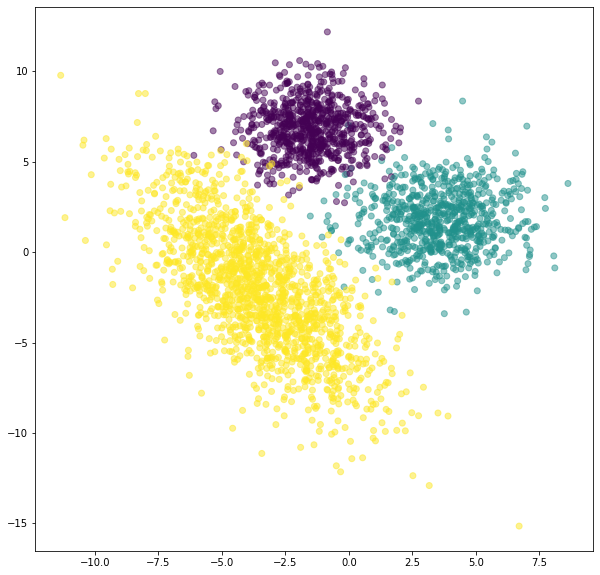

In [ ]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=35) # eps is the radius of the neighbourhood, 
                                        #  min_samples is the number of samples that must be in the neighbourhood to consider a sample as a Base sample 
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=35)

In [ ]:
np.unique(dbscan.labels_) # DBSCAN found 3 clusters and some Noise samples

array([-1,  0,  1,  2])

In [ ]:
len(np.where(dbscan.labels_ == -1)[0]) # let's find out how many Noise samples are there

368

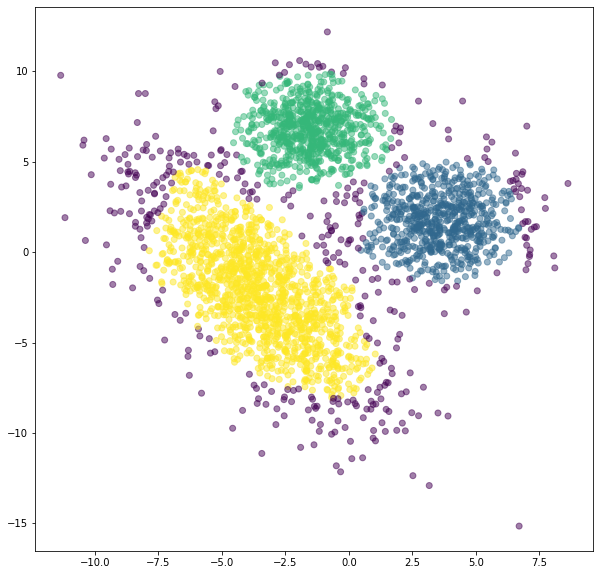

In [ ]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, alpha=0.5)
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.8, min_samples=35) # let's check how hyperparameters affect the DBSCAN result
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=35)

In [ ]:
len(np.where(dbscan.labels_ == -1)[0]) # I think you can see the difference

583

## DBSCAN

https://colab.research.google.com/drive/1PXNyiVd8J3M_-3jvmQOp4ruDKD0OZF3m?usp=sharing#scrollTo=hN1EyMGq_wod

https://github.com/SeldonIO/alibi-detect

In [ ]:
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix
import seaborn as sns

import sklearn
from scipy import stats

from IPython.display import set_matplotlib_formats
matplotlib.style.use('ggplot') # Other styles matplotlib.style.available
import os
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline
sns.set_context('notebook')
plt.close('all')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import numpy as np

In [ ]:
# data wrangling
import pandas as pd
# visualization
import matplotlib.pyplot as plt
# algorithm
from sklearn.cluster import DBSCAN

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ADSExperiments/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


The two most important parameter values the model takes are (i) esp, which specifies the distance between two points i.e., how close the data points should be to one another to be considered part of a cluster; and (ii) min_samples, which specifies the minimum number of neighbors a point should have in a cluster.

In [ ]:
# input data
data = df[["SepalLengthCm", "SepalWidthCm"]]
# specify & fit model
model = DBSCAN(eps = 0.4, min_samples = 10).fit(data)
print(model)

DBSCAN(eps=0.4, min_samples=10)


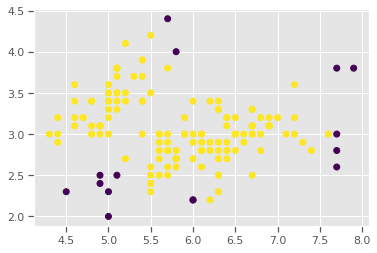

In [ ]:
# visualize outputs
colors = model.labels_
plt.scatter(data["SepalLengthCm"], data["SepalWidthCm"], c = colors)

Outlier values detected in purple color

In [ ]:
# outliers dataframe
outliers = data[model.labels_ == -1]
print(outliers)

     SepalLengthCm  SepalWidthCm
14             5.8           4.0
15             5.7           4.4
41             4.5           2.3
57             4.9           2.4
60             5.0           2.0
62             6.0           2.2
93             5.0           2.3
98             5.1           2.5
106            4.9           2.5
117            7.7           3.8
118            7.7           2.6
119            6.0           2.2
122            7.7           2.8
131            7.9           3.8
135            7.7           3.0


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/ADSExperiments/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
X = df.iloc[:, [3, 4]]
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


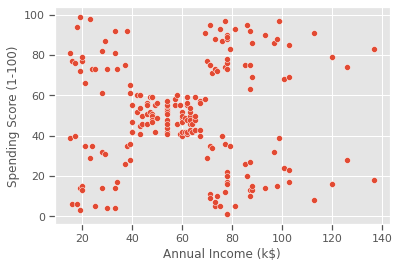

In [ ]:
sns.scatterplot(x= "Annual Income (k$)",y= "Spending Score (1-100)",
              data=df);

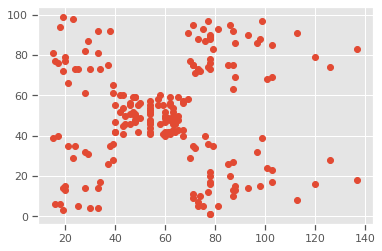

In [ ]:
# visualize outputs

plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"])

In [ ]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 5,min_samples = 4)

model = dbscan.fit(X)
print(model)
labels = model.labels_ 
print(labels)



DBSCAN(eps=5, min_samples=4)
[-1  0 -1  0 -1  0 -1 -1 -1  0 -1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  4 -1  2 -1  4  3  2  3  2 -1  2  3  4  3  2  3  2  3  4 -1  4
  3  4 -1  2  5  4  5  4  5  2  5  4  3  2  3  2 -1  4  3  4 -1 -1 -1 -1
 -1 -1  6 -1  6 -1  6 -1  6 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df

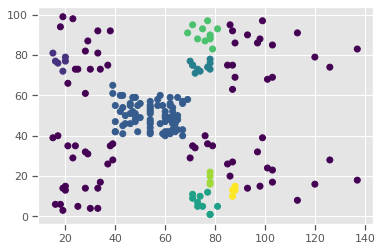

In [ ]:
# visualize outputs
colors = model.labels_
plt.scatter(df["Annual Income (k$)"], df["Spending Score (1-100)"], c = colors)

In [ ]:
# -1 value in anomaly_score column signifies that the data is anomalous
df["anomaly_score"] = labels
anomalies = df[df.anomaly_score == -1]
anomalies

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),anomaly_score
0,1,Male,19,15,39,-1
2,3,Female,20,16,6,-1
4,5,Female,31,17,40,-1
6,7,Female,35,18,6,-1
7,8,Female,23,18,94,-1
...,...,...,...,...,...,...
195,196,Female,35,120,79,-1
196,197,Female,45,126,28,-1
197,198,Male,32,126,74,-1
198,199,Male,32,137,18,-1
